<a href="https://colab.research.google.com/github/VictoriaOG1/Machine-Learning/blob/main/Callbacks_and_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond Hello World, A Computer Vision Example
In the previous exercise, you saw how to create a neural network that figured out the problem you were trying to solve. This gave an explicit example of learned behavior. Of course, in that instance, it was a bit of overkill because it would have been easier to write the function `y=2x-1` directly instead of bothering with using machine learning to learn the relationship between `x` and `y`.

But what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where you will build a neural network to recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow.

In [3]:
import tensorflow as tf

print(tf.__version__)

2023-03-10 19:57:29.647244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


The [Fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

This dataset is available directly in the [tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) API and you load it like this:

In [4]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.


In [5]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

What does these values look like? Let's print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


LABEL: 4

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   0 255 207 210 221 255   0   0   0   2   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  33  78 202 255 233 249 135 131  60   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 124 190 255 186  31 220 231 177  42 251 255 213  99   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0 173 235 215 210 228 186 149 255 145 174 233 213 223 242 187   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0  82 211 202 211 213 229 228 139 246 234 219 218 209 220 145   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 216 210 206 208 209 213 241 223 210 217 213 214 240   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   3   0 145 238 202 211 212 218 163 222 214 215 211 233 181   0   9   0   0   0   0   0]
 [  0   0   0   0   0   0   7   0 102 247 199 209 

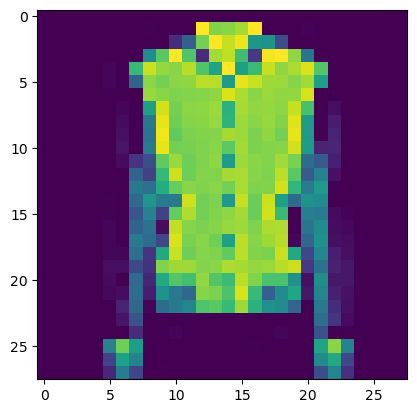

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 76

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [7]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

Now you might be wondering why the dataset is split into two: training and testing? Remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data that the model hasn't yet seen. This will be used to evaluate how good it would be at classifying values.

Let's now design the model. There's quite a few new concepts here. But don't worry, you'll get the hang of them. 

In [8]:
# Build the classification model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

2023-03-10 19:57:33.777350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 19:57:33.778561: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


The next thing to do, now that the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling `model.fit()` asking it to fit your training data to your training labels. It will figure out the relationship between the training data and its actual labels so in the future if you have inputs that looks like the training data, then it can predict what the label for that input is.

In [10]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 178s 95ms/step - loss: 0.4998 - accuracy: 0.8246
Epoch 2/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.3757 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 125s 67ms/step - loss: 0.3374 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 260s 139ms/step - loss: 0.3128 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 198s 106ms/step - loss: 0.2946 - accuracy: 0.8917


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like `0.9098`. This tells you that your neural network is about 91% accurate in classifying the training data. That is, it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images and labels. We can call [`model.evaluate()`](https://keras.io/api/models/model_training_apis/#evaluate-method) with this test dataset as inputs and it will report back the loss and accuracy of the model. Let's give it a try:

In [11]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 0.3664 - accuracy: 0.8669


[0.3663889765739441, 0.8669000267982483]

You can expect the accuracy here to be about `0.88` which means it was 88% accurate on the entire test set. As expected, it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

# Exploration Exercises

To explore further and deepen your understanding, try the below exercises:

### Exercise 1:
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers. Why do you think this is, and what do those numbers represent? 

In [12]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 8s 25ms/step
[5.1542878e-04 1.5217516e-07 8.6733132e-07 2.4165092e-06 1.2707735e-06 3.9041850e-03 3.0254298e-05 5.8109585e-02 6.0602695e-05 9.3737531e-01]


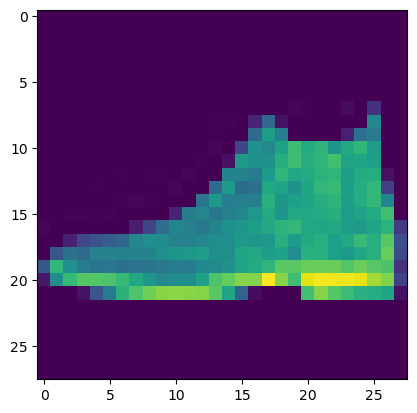

In [16]:
plt.imshow(test_images[0])


**Hint:** try running `print(test_labels[0])` -- and you'll get a `9`. Does that help you understand why this list looks the way it does? 

In [15]:
print(test_labels[0])

9


La lista de números anteriormente dada nos muestra las probabilidades que hay de que sea asociada a una clase o un label. Además todos los números suman 1. Es decir, el primer numero de la lista es la probabilidad de que sea parte de la primera clase, el segundo de la segunda clase y asi sucesivamente. La mayor probabilidad es la ultima clase y como se puede ver en el label asignado concuerda con la clase 9. Y está correcto, la imagen concuerda con la clase 9 que es una bota

### E1Q1: What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   **It's the probability that this item is each of the 10 classes**


### E1Q2: How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   **The 10th element on the list is the biggest, and the ankle boot is labelled 9**
2.   The ankle boot is label 9, and there are 0->9 elements in the list


### Exercise 2: 
Let's now look at the layers in your model. Experiment with different values for the dense layer with 512 neurons. What different results do you get for loss, training time etc? Why do you think that's the case? 


In [17]:
mnist = tf.keras.datasets.mnist

#Cargar del dataset las imagenes
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data() 

#Normalizar
training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 681s 363ms/step - loss: 0.1845
Epoch 2/5
1875/1875 [==============================] - 367s 195ms/step - loss: 0.0743
Epoch 3/5
1875/1875 [==============================] - 431s 230ms/step - loss: 0.0489
Epoch 4/5
1875/1875 [==============================] - 302s 161ms/step - loss: 0.0340
Epoch 5/5
313/313 [==============================] - 6s 17ms/step
[2.8562880e-10 8.9663832e-09 3.4422307e-08 3.8168687e-06 5.7091415e-12 1.1387264e-09 1.7985680e-10 9.9998641e-01 1.8064050e-08 9.7963111e-06]
7


Con 512 neuronas tomó 35m20.5s y accuraccy 0.9999, con 1024 tomó 37m45s y accuracy 0.9999

### E2Q1: Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. **Training takes longer, but no impact on accuracy**
3. Training takes the same time, but is more accurate


### Exercise 3: 

### E3Q1: What would happen if you remove the Flatten() layer. Why do you think that's the case? 



In [ ]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=1)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

ValueError: in user code:

    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2084, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/home/Alejandra/anaconda3/lib/python3.9/site-packages/keras/backend.py", line 5630, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


Sale error al momento de entrenar ya que el Flatten ayuda a pasar un arreglo 2D a un arreglo 1D que el resto de capas esperan. Si es que se quita la capa Flatten las otras capas no saben como procesar un arreglo 2D 

### Exercise 4: 

Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5.


In [23]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(15, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.3065
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1442
Epoch 3/5
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1055
Epoch 4/5
1875/1875 [==============================] - 210s 112ms/step - loss: 0.0842
Epoch 5/5
313/313 [==============================] - 6s 20ms/step
[9.4169235e-07 6.9448319e-08 2.7016437e-04 6.6932035e-04 1.7843927e-09 3.0119085e-07 3.2419855e-11 9.9900889e-01 2.4347302e-05 2.5922289e-05 1.9207992e-10 1.8388377e-10 1.8099630e-10 2.4485190e-11 6.8000092e-11]
7


El número de neuronas depende de las clases que se quieran tener para clasificar, en este caso el dataset tiene 10 clases por lo que se colocan 10. Si se llegan a colocar menos, como por ejemplo 5, solo va a clasificar 5 clases y el resto no va a poder identificar de que clase son por lo que da error. Por otra parte si se incrementa el valor a más de 10 ya a tener un overfitting y no va a poder generalizar datos que no conoce

### Exercise 5: 

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 


In [24]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),# Add a layer here, 512 nodos RELU
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)# Add a layer here, 10 nodos, softmax
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 453s 241ms/step - loss: 0.1839
Epoch 2/5
1875/1875 [==============================] - 517s 276ms/step - loss: 0.0781
Epoch 3/5
1875/1875 [==============================] - 488s 260ms/step - loss: 0.0553
Epoch 4/5
1875/1875 [==============================] - 441s 235ms/step - loss: 0.0397
Epoch 5/5
313/313 [==============================] - 9s 27ms/step
[1.2284473e-10 9.0312220e-09 6.6741586e-09 2.5315322e-07 7.6233714e-11 1.6091701e-11 1.0390980e-13 9.9999714e-01 3.2597977e-10 2.6565688e-06]
7


Aumentando una capa oculta, el modelo se vuelve más complejo y va a tener la capacidad de aprender patrones de datos complejos pero el problema de esto es que puede llegar al overfitting aunque aumenta el accuracy del modelo

### Exercise 6: 

### E6Q1: Consider the impact of training for more or less epochs. Why do you think that would be the case? 

- Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
- Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases.

This is a side effect of something called 'overfitting' which you can learn about later and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [25]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 186s 99ms/step - loss: 0.2629
Epoch 2/30
1875/1875 [==============================] - 211s 113ms/step - loss: 0.1169
Epoch 3/30
1875/1875 [==============================] - 225s 120ms/step - loss: 0.0819
Epoch 4/30
1875/1875 [==============================] - 190s 101ms/step - loss: 0.0589
Epoch 5/30
1875/1875 [==============================] - 190s 102ms/step - loss: 0.0462
Epoch 6/30
1875/1875 [==============================] - 212s 113ms/step - loss: 0.0369
Epoch 7/30
1875/1875 [==============================] - 223s 119ms/step - loss: 0.0286
Epoch 8/30
1875/1875 [==============================] - 219s 117ms/step - loss: 0.0227
Epoch 9/30
1875/1875 [==============================] - 195s 104ms/step - loss: 0.0186
Epoch 10/30
1875/1875 [==============================] - 225s 120ms/step - loss: 0.0160
Epoch 11/30
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0139
Epoch 12/30
1875/1875 [===================

El modelo se entrenará para más iteraciones en los datos de entrenamiento, lo que puede dar como resultado un mayor accuracy tanto en los conjuntos de entrenamiento como de prueba si no ocurre overfitting. Sin embargo, si entrena el modelo durante demasiadas épocas, puede llegar al overfitting, lo que significa que se especializa demasiado en los datos de entrenamiento y pierde la capacidad de generalizar a nuevos datos.

### Exercise 7: 

Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [26]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 606s 323ms/step - loss: 2.6004
Epoch 2/5
1875/1875 [==============================] - 544s 290ms/step - loss: 0.3549
Epoch 3/5
1875/1875 [==============================] - 548s 292ms/step - loss: 0.2876
Epoch 4/5
1875/1875 [==============================] - 612s 327ms/step - loss: 0.2733
Epoch 5/5
313/313 [==============================] - 46s 147ms/step
[7.4543534e-27 8.5210487e-16 1.1029573e-09 3.2372920e-09 1.3762672e-21 2.1226433e-16 0.0000000e+00 1.0000000e+00 1.4016285e-23 2.5560856e-14]
7


Se obtienen diferentes resultados ya que las redes nueronales funcionan mejor cuando los datos se encuentran entre 0 y 1. Así dejando los valores de 0 a 255 el modelo toma más tiempo en entrenar y tiene mayor pérdida. Además los gradientes durante el backpropagation se hacen más grandes y puede ocasionar que el modelo no converja

### Exercise 8: 

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [27]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.85): # Experiment with changing this value
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])


Epoch 1/50
1875/1875 [==============================] - 492s 262ms/step - loss: 0.4768 - accuracy: 0.8300
Epoch 2/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.3623 - accuracy: 0.8671
Reached 85% accuracy so cancelling training!
1875/1875 [==============================] - 510s 272ms/step - loss: 0.3624 - accuracy: 0.8671
